<a href="https://colab.research.google.com/github/Esmail97/ML-projects/blob/main/HeartDiseas_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns

#Exploratory Data Analysis

In [2]:
df = pd.read_csv('/content/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.shape

(918, 12)

In [4]:
#get more information about numerical columns
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

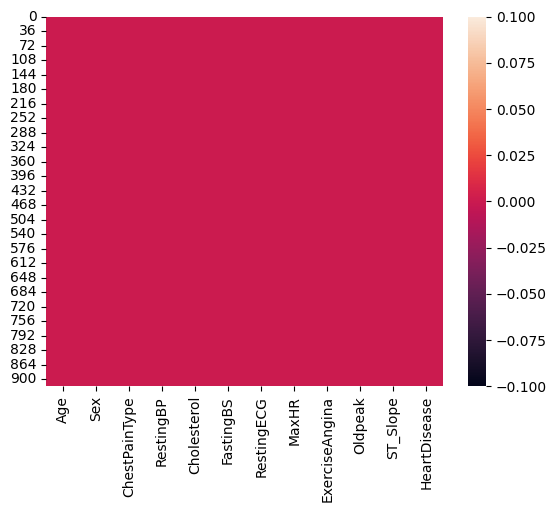

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.duplicated().sum()

0

<ipython-input-8-5b8ca5a89c65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

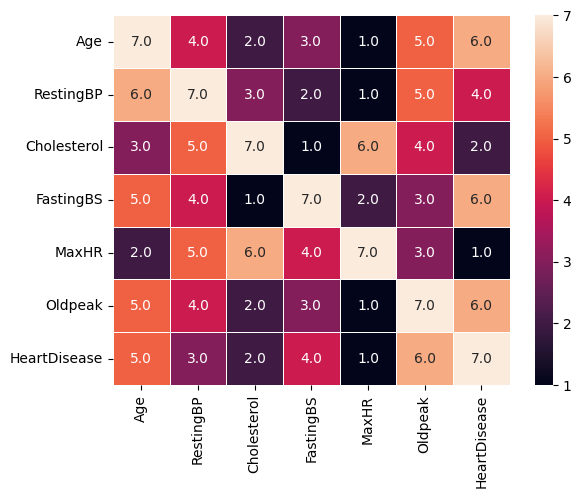

In [8]:
#get correlation
cor = df.corr()
sns.heatmap(cor.rank(axis = 'columns'),annot=True ,fmt = '.1f' , linewidths=.5)

In [9]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

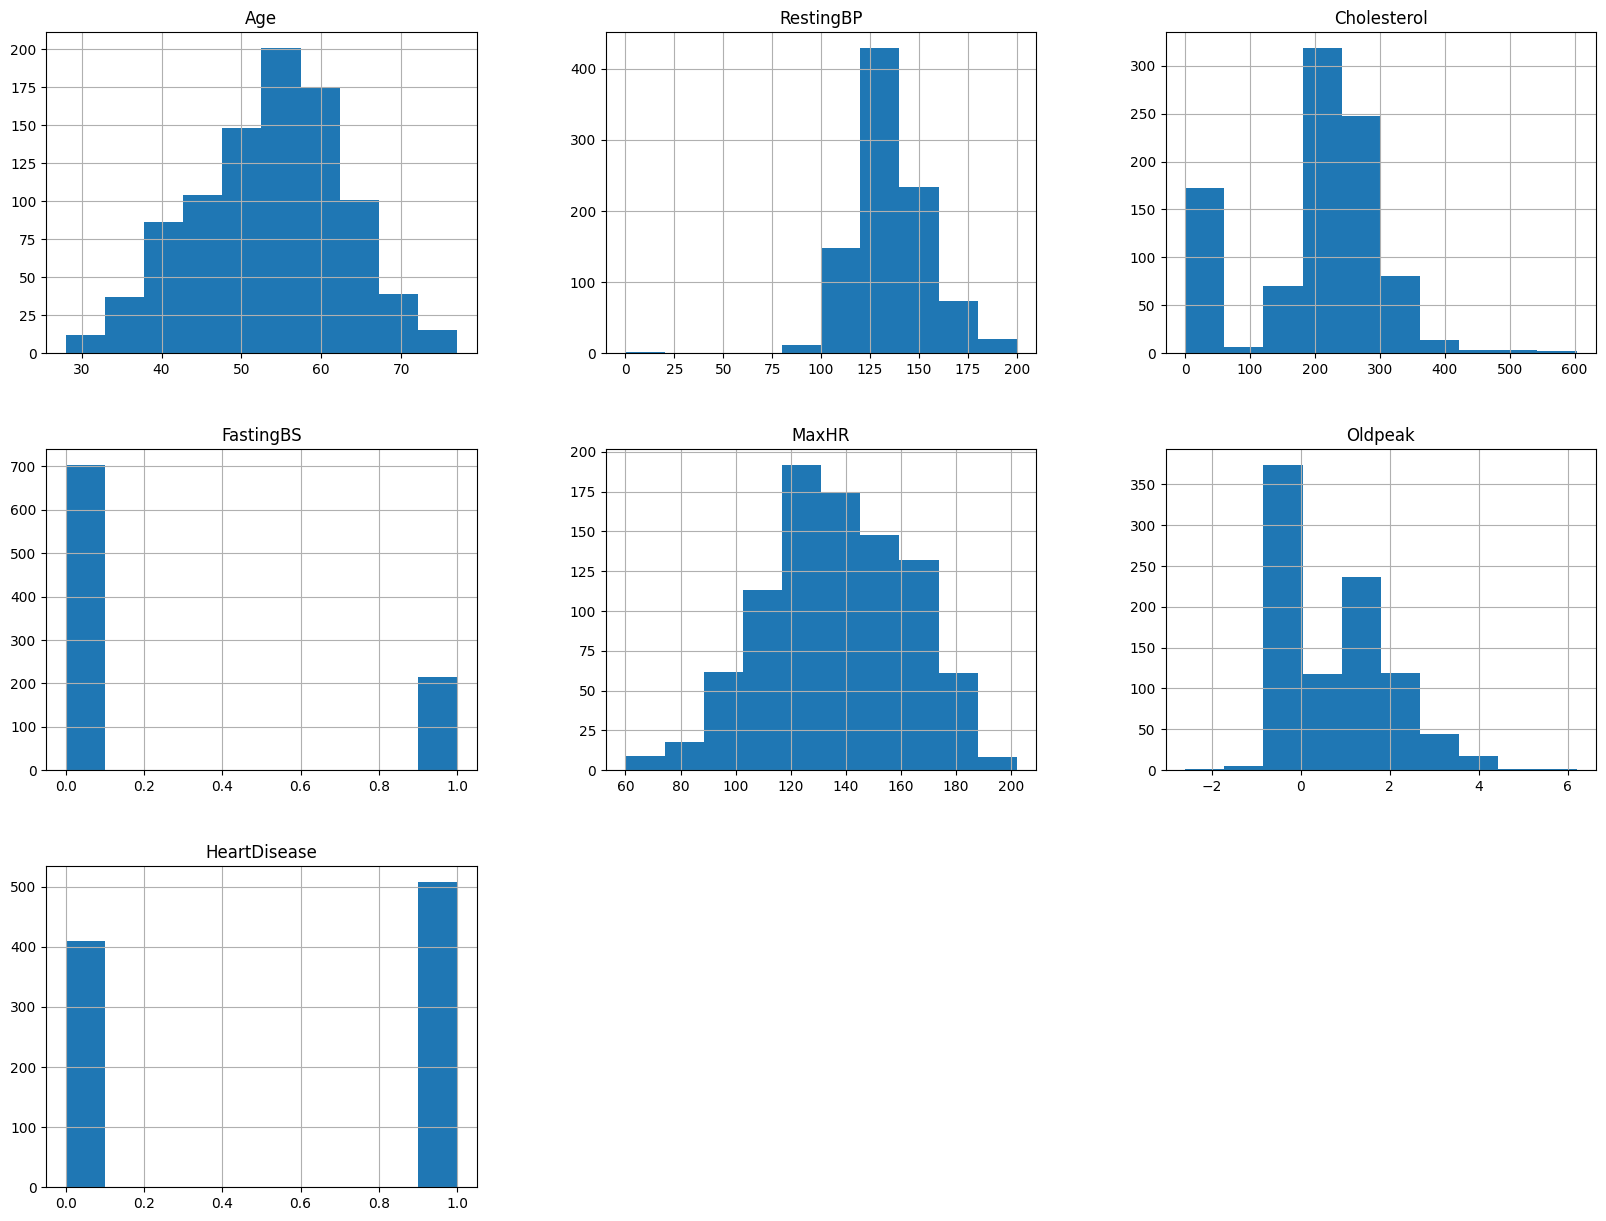

In [10]:
df.hist(figsize=(20,15))
plt.show()

#Procissing Data

In [11]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [12]:
#splitting data into object and numerical
obj = df.select_dtypes(include='object')
nun_obj = df.select_dtypes(exclude='object')

In [13]:
#using for loop to transform object columns
#to numeric colmns
for i in range(0,obj.shape[1]):
  obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])

<ipython-input-13-b6494580d5bd>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])
<ipython-input-13-b6494580d5bd>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])
<ipython-input-13-b6494580d5bd>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.is

In [14]:
#concatenate two dataframes in one table
data = pd.concat([obj,nun_obj],axis = 1)
data

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,68,144,193,1,141,3.4,1
915,1,0,1,1,1,57,130,131,0,115,1.2,1
916,0,1,0,0,1,57,130,236,0,174,0.0,1


In [15]:
#machine learning models to predict HeartDiseas value
#import models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error ,r2_score

In [16]:
X = data.drop(['HeartDisease'],axis = 1)
X

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,1,1,1,0,2,40,140,289,0,172,0.0
1,0,2,1,0,1,49,160,180,0,156,1.0
2,1,1,2,0,2,37,130,283,0,98,0.0
3,0,0,1,1,1,48,138,214,0,108,1.5
4,1,2,1,0,2,54,150,195,0,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2
914,1,0,1,0,1,68,144,193,1,141,3.4
915,1,0,1,1,1,57,130,131,0,115,1.2
916,0,1,0,0,1,57,130,236,0,174,0.0


In [17]:
y = data['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#Linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,y_train)
y_pred = lin_reg_model.predict(X_test)
print('Mean Square Error: ', mean_squared_error(y_test,y_pred))

Mean Square Error:  0.13729077851615482


In [22]:
#Logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)
y_pred2 = log_reg_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,y_pred2))

Accuracy Score:  0.842391304347826


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred3 = rf_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,y_pred3))

Accuracy Score:  0.8804347826086957


In [24]:
#AdaBoostClassifier
ada_boost_model = AdaBoostClassifier()
ada_boost_model.fit(X_train,y_train)
y_pred4 = ada_boost_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,y_pred4))

Accuracy Score:  0.8532608695652174


In [30]:
#DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train,y_train)
y_pred5 = dtree_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,y_pred5))

Accuracy Score:  0.7989130434782609


In [31]:
#Support Vector Machine (SVM)
svm_linear_model = SVC(kernel='linear')
svm_linear_model.fit(X_train,y_train)
y_pred6 = svm_linear_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,y_pred6))

Accuracy Score:  0.8369565217391305


In [32]:
#Support Vector Machine (SVM)
svm_poly_model = SVC(kernel='poly')
svm_poly_model.fit(X_train,y_train)
y_pred7 = svm_poly_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,y_pred7))

Accuracy Score:  0.6793478260869565


In [33]:
#Support Vector Machine (SVM)
svm_sigmoid_model = SVC(kernel='sigmoid')
svm_sigmoid_model.fit(X_train,y_train)
y_pred8 = svm_sigmoid_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,y_pred8))

Accuracy Score:  0.44021739130434784


In [34]:
#KNeighborsClassifier (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred9 = knn_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test,y_pred9))

Accuracy Score:  0.7010869565217391
